In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten

# loading dataset

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


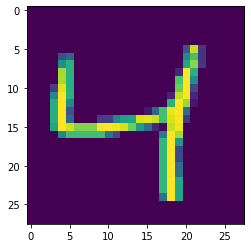

In [4]:
plt.imshow(X_train_full[2])

In [7]:
y_train_full[2]

4

# Constructing Neural Network

### Data Normalization <br>


In [8]:
batch_size = 128
num_classes = 10
epochs = 10

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

Splitting dataset into train, validation and test 

In [10]:
X_valid, X_train = X_train_n[:30000], X_train_n[30000:]
y_valid, y_train = y_train_full[:30000], y_train_full[30000:]
X_test = X_test_n

### Building Model 


In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-tr

# Training Neural Network


In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [28]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_valid, y_valid))

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.4602 - accuracy: 0.8643 - val_loss: 0.2337 - val_accuracy: 0.9317
Epoch 2/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3245 - accuracy: 0.9081 - val_loss: 0.1855 - val_accuracy: 0.9450
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2646 - accuracy: 0.9260 - val_loss: 0.1652 - val_accuracy: 0.9510
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2234 - accuracy: 0.9374 - val_loss: 0.1464 - val_accuracy: 0.9565
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.2012 - accuracy: 0.9420 - val_loss: 0.1418 - val_accuracy: 0.9587
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1796 - accuracy: 0.9490 - val_loss: 0.1406 - val_accuracy: 0.9586
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1646 - accuracy: 0.9534 - val_loss: 0.1250 - val_accuracy: 0.9634
Epoch 

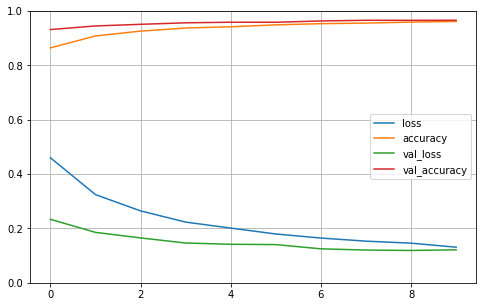

In [32]:
import pandas as pd

pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating and Predicting the model's performance

In [40]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9681


In [41]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10940811783075333
Test accuracy: 0.9681000113487244


In [34]:
X_new = X_test[:3]

In [35]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])

AxesImage(54,36;334.8x217.44)


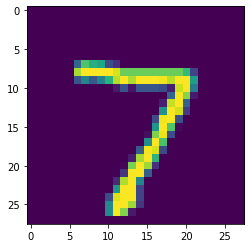

In [39]:
print(plt.imshow(X_test[0]))

In [42]:
model.save("Handwritten digit recognizer.h5")